Online retail 
---

This Online Retail II data set contains all the transactions occurring for a UK-based and registered, non-store online retail between 01/12/2009 and 09/12/2011.The company mainly sells unique all-occasion gift-ware. Many customers of the company are wholesalers.


# TASK 1 prepare & clean
---

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from feature_engine.outliers import Winsorizer

In [3]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
df_raw = pd.read_csv('/Users/natthakitngamcharoensin/Documents/projects/retail_store/online_retail_II.csv')

In [5]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067371 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   Invoice      1067371 non-null  object 
 1   StockCode    1067371 non-null  object 
 2   Description  1062989 non-null  object 
 3   Quantity     1067371 non-null  int64  
 4   InvoiceDate  1067371 non-null  object 
 5   Price        1067371 non-null  float64
 6   Customer ID  824364 non-null   float64
 7   Country      1067371 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 65.1+ MB


 **Find NaN rows**

In [6]:
df_raw.isnull().sum()

Invoice             0
StockCode           0
Description      4382
Quantity            0
InvoiceDate         0
Price               0
Customer ID    243007
Country             0
dtype: int64

 **Let's see NaN rows in dataframe**

In [7]:
df_raw[df_raw.isnull().any(axis=1)]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
263,489464,21733,85123a mixed,-96,2009-12-01 10:52:00,0.00,NaN,United Kingdom
283,489463,71477,short,-240,2009-12-01 10:52:00,0.00,NaN,United Kingdom
284,489467,85123A,21733 mixed,-192,2009-12-01 10:53:00,0.00,NaN,United Kingdom
470,489521,21646,NaN,-50,2009-12-01 11:44:00,0.00,NaN,United Kingdom
577,489525,85226C,BLUE PULL BACK RACING CAR,1,2009-12-01 11:49:00,0.55,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
1066997,581498,85099B,JUMBO BAG RED RETROSPOT,5,2011-12-09 10:26:00,4.13,NaN,United Kingdom
1066998,581498,85099C,JUMBO BAG BAROQUE BLACK WHITE,4,2011-12-09 10:26:00,4.13,NaN,United Kingdom
1066999,581498,85150,LADIES & GENTLEMEN METAL SIGN,1,2011-12-09 10:26:00,4.96,NaN,United Kingdom
1067000,581498,85174,S/4 CACTI CANDLES,1,2011-12-09 10:26:00,10.79,NaN,United Kingdom


 **Drop NaN CustomerID then create dataframe name df_new**

In [8]:
df_new = df_raw.dropna().reset_index(drop=True)
df_new.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


 **Drop negative Quantity value**

In [9]:
df_new = df_new[df_new['Quantity'] > 0 ]
df_new.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


 **Create total columns**

total = quantity * price

In [10]:
df_new['Sales'] = df_new['Quantity'] * df_new['Price']
df_new.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Sales
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.4
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.8
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.0


In [11]:
df_new = df_new.reset_index(drop=True)

In [69]:
df_new.to_csv('/Users/natthakitngamcharoensin/Documents/projects/retail_store/edit_online_retail.csv')

# TASK 2 Visualize the dataset
---
I use Tableau for visualizing charts that may be interesting

![monthly_revenue](https://raw.githubusercontent.com/natthakitnga/projects/main/img/monthly_revenue.png)

The 1st line chart show monthly revenue 2010-2011. Let's see August to november have a lot of revenue , But in the beginning of the year have lower than end of the year.
--

![hourly_revenue](https://raw.githubusercontent.com/natthakitnga/projects/main/img/hourly_revenue.png)

The 2nd bar chart on the left shows hourly sales. and on the right shows hourly revenue. At 12.00 there will be the highest sales and the highest revenue as well. Looking at 10:00 is the No.7 in hourly sales, but at 10:00 is the No.3 in hourly revenue . It can be said that during this period most of the customers buy high-priced items during this time.
--

![top10_sold](https://raw.githubusercontent.com/natthakitnga/projects/main/img/top10_sold.png)

The 3rd bar chart shows top 10 most sold products. No. 1 have a sold volume is 109,169 units. This piece is an airplane toy that is suitable for children to practice development, which will result in the highest sales.[1]
--



[1]:https://www.rexlondontrade.com/p/world-war-2-glider-assorted-designs

# TASK 3 Data transformation
---
find skew and transfrom to normal distribution

In [13]:
df_seg = df_new

# Create per-customer data
df_customers = df_seg.groupby('Customer ID').agg({'Sales': sum, 'Invoice': lambda x:x.nunique()}).reset_index()

# Create new dataframe per-customer
df_customers.columns = ['CustomerID', 'TotalSales', 'OrderCounts']
df_customers['AvgOrdervalue'] = df_customers['TotalSales'] / df_customers['OrderCounts']

df_customers.head()

,CustomerID,TotalSales,OrderCounts,AvgOrdervalue
0,12346.0,77556.46,12,6463.038333
1,12347.0,5633.32,8,704.165000
2,12348.0,2019.40,5,403.880000
3,12349.0,4428.69,4,1107.172500
4,12350.0,334.40,1,334.400000


TotalSales's: Skew: 25.313728821893758, : SkewtestResult(statistic=105.79630693342664, pvalue=0.0)
OrderCounts's: Skew: 12.650769732281555, : SkewtestResult(statistic=88.02896182144744, pvalue=0.0)
AvgOrdervalue's: Skew: 57.00582013022686, : SkewtestResult(statistic=126.60890004131225, pvalue=0.0)


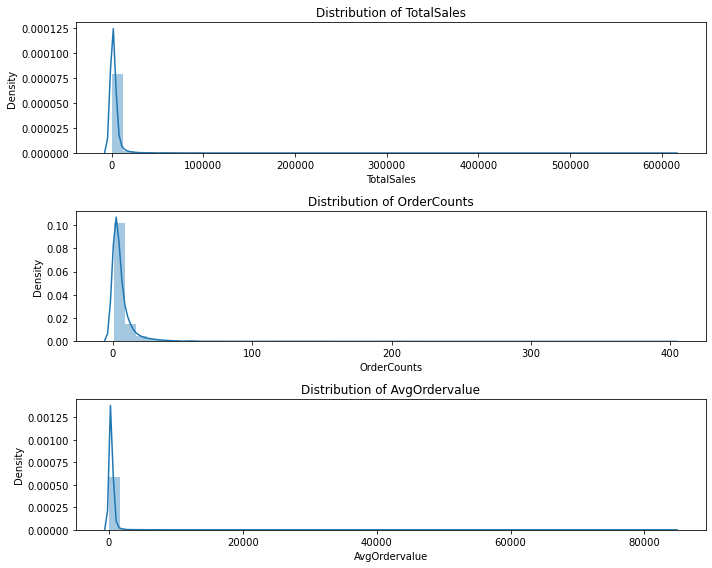

In [14]:
# Check skew before put to clustering

# create function to check and plot skew
def check_skew(df_skew, column):
    skew = stats.skew(df_skew[column])
    skewtest = stats.skewtest(df_skew[column])
    plt.title('Distribution of ' + column)
    sns.distplot(df_skew[column])
    print("{}'s: Skew: {}, : {}".format(column, skew, skewtest))
    return

# Plot 3 graphs 
plt.figure(figsize=(10, 8))

plt.subplot(3,1,1)
check_skew(df_customers,'TotalSales')

plt.subplot(3,1,2)
check_skew(df_customers,'OrderCounts')

plt.subplot(3,1,3)
check_skew(df_customers,'AvgOrdervalue')

plt.tight_layout()

TotalSales's: Skew: 0.20783978660602312, : SkewtestResult(statistic=6.447109664887597, pvalue=1.1400330036139414e-10)
OrderCounts's: Skew: 1.0016489004850366, : SkewtestResult(statistic=26.45217160951463, pvalue=3.444777112568677e-154)
AvgOrdervalue's: Skew: -0.1668734115899421, : SkewtestResult(statistic=-5.195435471547677, pvalue=2.0424117329587745e-07)


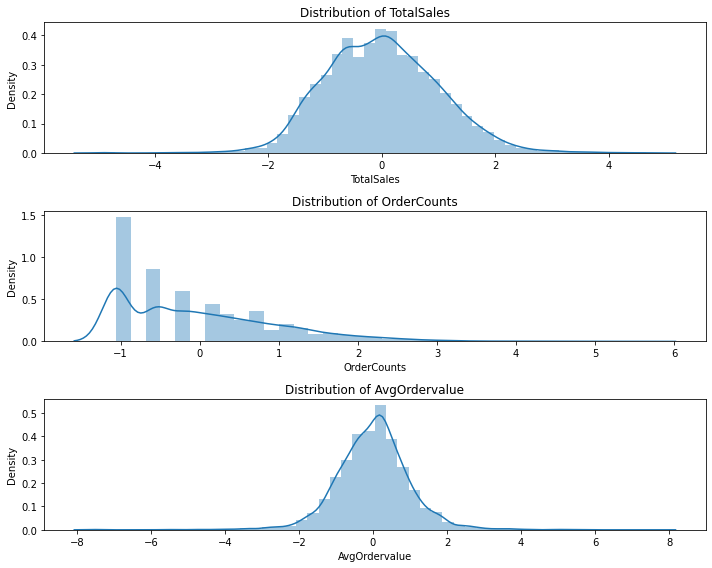

In [15]:
# Detected Right-Skew by use log tranformation
# Create new-dataframe 
df_customers_log = np.log(df_customers+1)

# To find Clustering much use normal distribution
# Create new-dataframe 
scaler = StandardScaler()
scaler.fit(df_customers_log)
customer_scaled = scaler.transform(df_customers_log)

# customer_scaled 
customer_scaled = pd.DataFrame(customer_scaled, columns=df_customers.columns)

# plot 3 graph by scaler 
plt.figure(figsize=(10, 8))

plt.subplot(3,1,1)
check_skew(customer_scaled,'TotalSales')

plt.subplot(3, 1, 2)
check_skew(customer_scaled,'OrderCounts')

plt.subplot(3, 1, 3)
check_skew(customer_scaled,'AvgOrdervalue')

plt.tight_layout()

# TASK 4 Find Customer segmentation with K-means clustering
---
k-means clustering is one of the simple and common used algorithms. It tries to find cluster centres that are representative of certain regions of the data. 

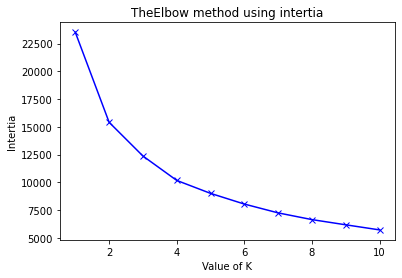

In [16]:
# use K-means clustering
intertia_scores = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(customer_scaled)
    intertia_scores.append(kmeans.inertia_)

# plot Elbow method using inertia
plt.plot(range(1,11), intertia_scores, 'bx-')
plt.xlabel('Value of K')
plt.ylabel('Intertia')
plt.title('TheElbow method using intertia')
plt.show()

In [17]:
# chosen n = 4 cluster
kmeans = KMeans(n_clusters=4,max_iter=10, random_state=0, init='random')
kmeans.fit(customer_scaled)

KMeans(init='random', max_iter=10, n_clusters=4, random_state=0)

In [18]:
# Create new dataframe 
df_four_cluster = pd.merge(df_customers[['CustomerID']], customer_scaled[['TotalSales', 'OrderCounts', 'AvgOrdervalue']]\
                , left_index=True, right_index=True)

df_four_cluster['Cluster'] = kmeans.labels_
df_four_cluster.head()

,CustomerID,TotalSales,OrderCounts,AvgOrdervalue,Cluster
0,12346.0,3.170387,1.254938,4.206750,2
1,12347.0,1.291999,0.800635,1.238848,2
2,12348.0,0.557317,0.299705,0.495604,3
3,12349.0,1.119681,0.074457,1.844377,3
4,12350.0,-0.729063,-1.057568,0.243409,3


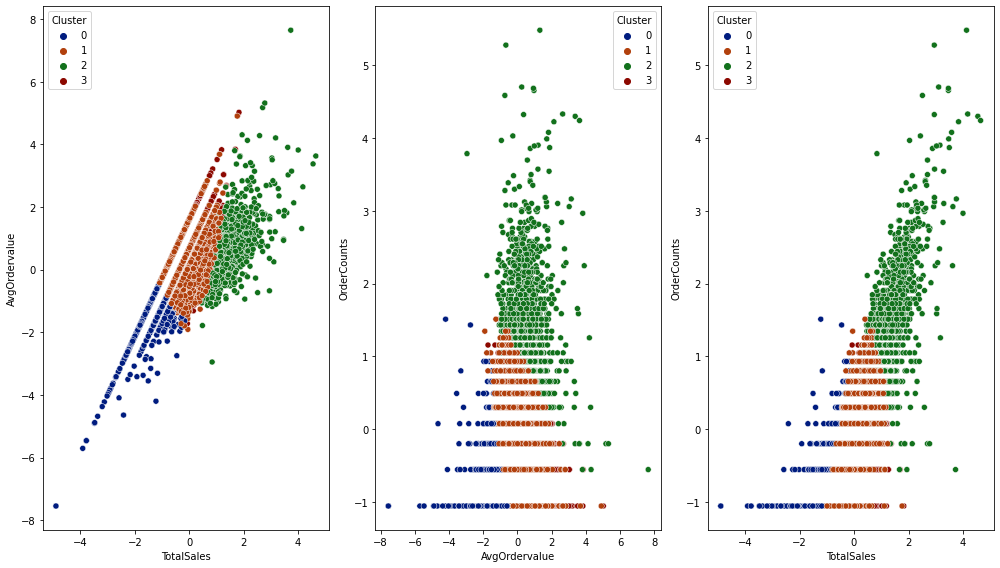

In [19]:
## plot 3 graph then let see 4 segment of customer
plt.figure(figsize=(14,8))

plt.subplot(1,3,1)
sns.scatterplot('TotalSales', 'AvgOrdervalue', data=df_four_cluster, hue='Cluster', palette='dark')

plt.subplot(1,3,2)
sns.scatterplot('AvgOrdervalue', 'OrderCounts', data=df_four_cluster, hue='Cluster', palette='dark')

plt.subplot(1,3,3)
sns.scatterplot('TotalSales', 'OrderCounts', data=df_four_cluster, hue='Cluster', palette='dark')

plt.tight_layout()

<AxesSubplot:xlabel='Cluster', ylabel='AvgOrdervalue'>

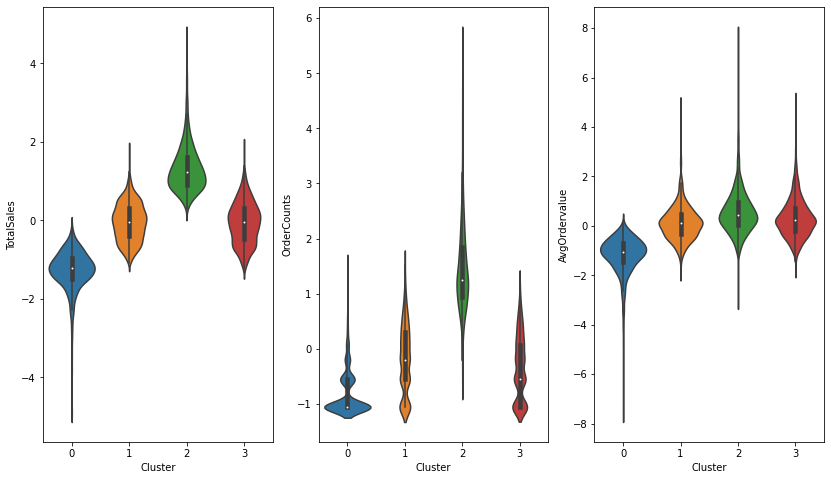

In [20]:
#plot violinplot
plt.figure(figsize=(14,8))

plt.subplot(1,3,1)
sns.violinplot(x='Cluster', y='TotalSales', data=df_four_cluster)

plt.subplot(1,3,2)
sns.violinplot(x='Cluster', y='OrderCounts', data=df_four_cluster)

plt.subplot(1,3,3)
sns.violinplot(x='Cluster', y='AvgOrdervalue', data=df_four_cluster)

In [21]:
# add column Cluster to df_customers
df_customers['Cluster'] = kmeans.labels_

# join df_seg(dataframe before tranfromation) and cluster
customer_segment = pd.merge(df_seg, df_customers[['CustomerID','Cluster']], left_on=['Customer ID'], right_on=['CustomerID'])

# change cluster to name
customer_segment = customer_segment.drop(columns='Customer ID')
customer_segment['Cluster'] = customer_segment['Cluster'].replace([0,1,2,3] , ['one-time buyers', 'second place high-spend', 'loyal', 'first high-spend'])
customer_segment.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Country,Sales,CustomerID,Cluster
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,United Kingdom,83.4,13085.0,first high-spend
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,United Kingdom,81.0,13085.0,first high-spend
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,United Kingdom,81.0,13085.0,first high-spend
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,United Kingdom,100.8,13085.0,first high-spend
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,United Kingdom,30.0,13085.0,first high-spend


 Conclusion
--
 * <strong>'one-time buyers'</strong> is lowest total Sales and purchase not often ,But average in every invoice as same each Cluster.
 * <strong>second place high-spend</strong> is total Sales lower than Loyal but purchase as same on one-time buyers.
 * <strong>'Loyal'</strong> high spend, purchase often and lot of total Sales.
 * <strong>first place high-spend</strong> this segment similar to second place high-spend but have more average order.


Find the most popular purchase by segment 
--

![popular_purchase](https://raw.githubusercontent.com/natthakitnga/projects/main/img/popular_segment.png)

This graph is benefit after use customer segmentation. We can suggest product should be recommended to any customer segment, for example in the Loyal suggest white hanging heart T-light holder (this product is the popular purchase in Loyal segment)

References :

1 : https://towardsdatascience.com/data-driven-customer-segmentation-c16062741a7c

2 : https://github.com/jasneekchugh/Customer-Segmentation-using-K-mean/blob/main/K-means%20clustering%20using%20RFM%20variables.ipynb

3 : https://grimreaperjunior.medium.com/สกัดข้อมูลให้ตรงใจด้วยการทำ-feature-engineering-bcdba80124bc